In [1]:
from outlierdetection.outlierdetection import outlierdetection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,copy,glob
cwd = os.getcwd()
cwd


'/Users/kbhirombhakdi/_work/[Packages]/outlierdetection/demo'

# Load data

In [2]:
tmp = glob.glob('*.dat')
flist = {}
for i in tmp:
    tmpp = i.split('/')[-1].split('_')[0]
    flist[tmpp] = {}
    flist[tmpp]['file'] = i
    flist[tmpp]['df'] = pd.read_csv(i)
flist


{'201911XX': {'file': '201911XX_join.dat',
  'df':           LAMBDA          FLUX        FERROR
  0      8017.0293  2.106617e-18  1.209777e-18
  1      8017.9940  6.412462e-19  1.167927e-18
  2      8019.0137 -1.462729e-19  1.227455e-18
  3      8019.9570 -1.311157e-18  1.181727e-18
  4      8021.4355 -1.311091e-18  1.374978e-18
  ...          ...           ...           ...
  1507  16474.8790  7.900050e-19  3.628732e-19
  1508  16478.6970  7.110636e-19  3.508041e-19
  1509  16480.9360  1.336798e-18  3.416594e-19
  1510  16484.7320  1.525413e-19  3.391656e-19
  1511  16486.9650  2.257219e-19  3.589449e-19
  
  [1512 rows x 3 columns]},
 '202001XX': {'file': '202001XX_join.dat',
  'df':           LAMBDA          FLUX        FERROR
  0      8016.7920 -2.604165e-18  1.806162e-18
  1      8017.7600 -2.291750e-18  1.515551e-18
  2      8018.7810 -3.354268e-18  1.658448e-18
  3      8019.7266 -2.206930e-18  1.380322e-18
  4      8019.8170  7.169350e-19  1.655886e-18
  ...          ...       

# SN cut

In [3]:
sncut = 1.
keepneg = True

In [4]:
for i in flist:
    tmp = flist[i]['df']
    data = tmp.FLUX.values
    noise = tmp.FERROR.values
    method = {'name': 'sn',
              'rule': {'minp':sncut, 'noise':noise, 'keepneg':keepneg}
             }
    tmpp = outlierdetection(data,method)
    tmp['MASKGOOD_SN'] = tmpp.copy()
    flist[i]['df'] = tmp.copy()
flist
    

sn complete
sn complete
sn complete
sn complete


{'201911XX': {'file': '201911XX_join.dat',
  'df':           LAMBDA          FLUX        FERROR  MASKGOOD_SN
  0      8017.0293  2.106617e-18  1.209777e-18         True
  1      8017.9940  6.412462e-19  1.167927e-18        False
  2      8019.0137 -1.462729e-19  1.227455e-18        False
  3      8019.9570 -1.311157e-18  1.181727e-18         True
  4      8021.4355 -1.311091e-18  1.374978e-18        False
  ...          ...           ...           ...          ...
  1507  16474.8790  7.900050e-19  3.628732e-19         True
  1508  16478.6970  7.110636e-19  3.508041e-19         True
  1509  16480.9360  1.336798e-18  3.416594e-19         True
  1510  16484.7320  1.525413e-19  3.391656e-19        False
  1511  16486.9650  2.257219e-19  3.589449e-19        False
  
  [1512 rows x 4 columns]},
 '202001XX': {'file': '202001XX_join.dat',
  'df':           LAMBDA          FLUX        FERROR  MASKGOOD_SN
  0      8016.7920 -2.604165e-18  1.806162e-18         True
  1      8017.7600 -2.291750e-1

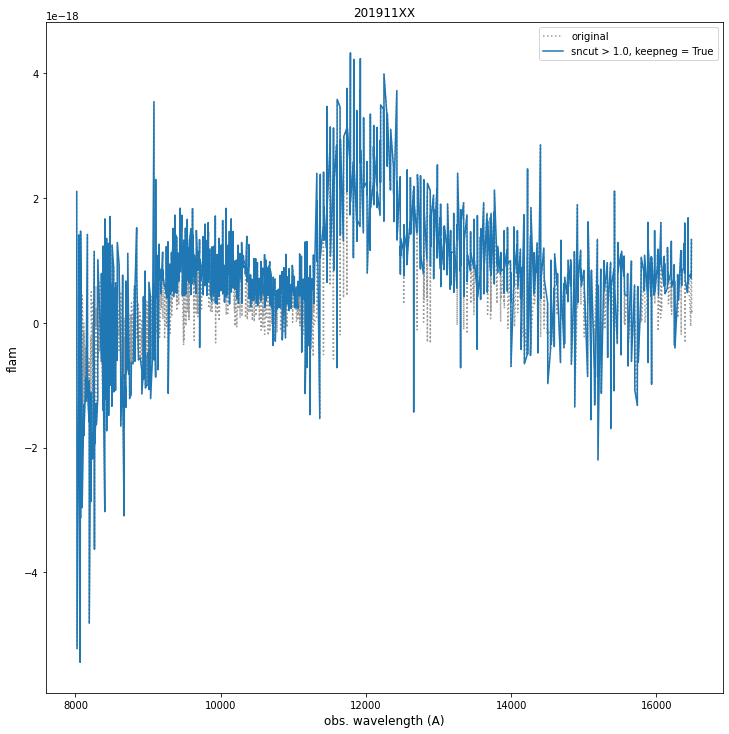

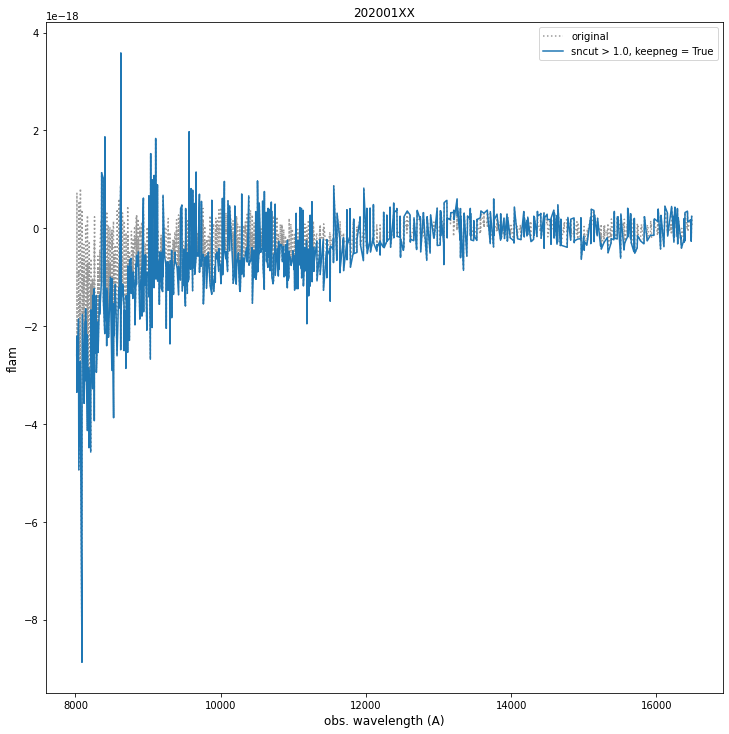

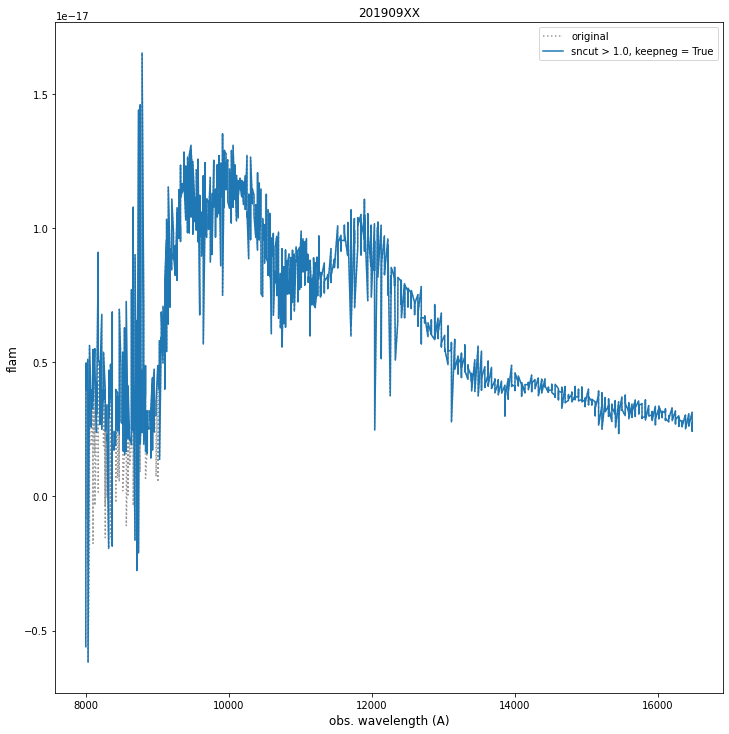

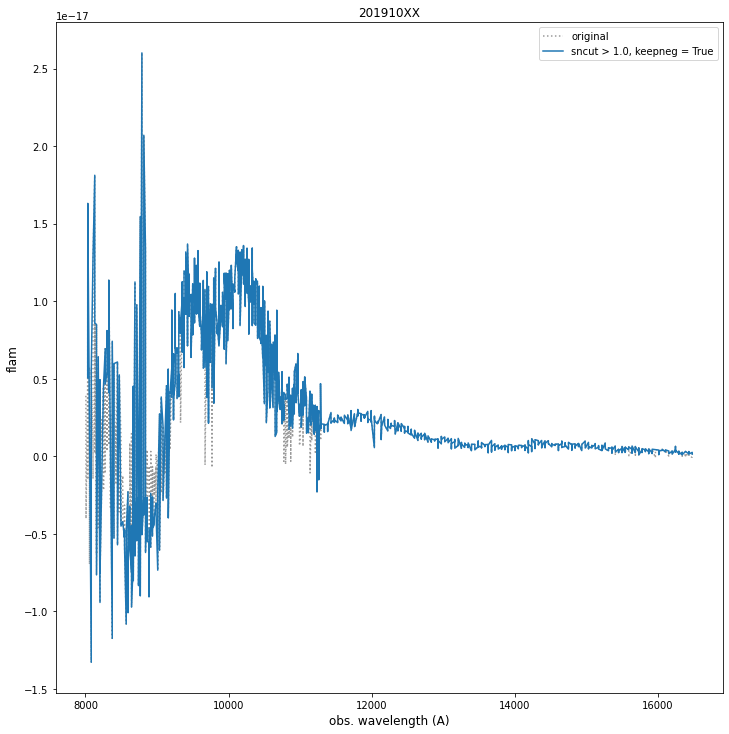

In [5]:
for i in flist:
    tmp = flist[i]['df']
    plt.figure(figsize=(10,10))
    tmpx,tmpy,m = tmp.LAMBDA.values,tmp.FLUX.values,tmp.MASKGOOD_SN.values
    plt.plot(tmpx,tmpy,'k:',alpha=0.4,label='original')
    tmpx,tmpy = tmpx[m],tmpy[m]
    plt.plot(tmpx,tmpy,label='sncut > {0}, keepneg = {1}'.format(sncut,keepneg))
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.title(i,fontsize=12)
    plt.xlabel('obs. wavelength (A)',fontsize=12)
    plt.ylabel('flam',fontsize=12)
    string = '{0}_sncut.pdf'.format(i)
    plt.savefig(string,format='pdf',bbox_inches='tight')
    

# Local Sigma Clipping

In [6]:
sigma = 3.
niter = 5
dictionary = {'window_length':11,
              'polyorder':1
             }


In [7]:
for i in flist:
    tmp = flist[i]['df']
    data = tmp.FLUX.values
    noise = tmp.FERROR.values
    method = {'name':'sigmalocal',
              'rule': {'sigma':sigma, 'noise':noise, 'keepneg':True, 'niter':niter, 'initmask':None, 'params':dictionary}
             }
    tmpp = outlierdetection(data,method)
    tmp['MASKGOOD_SIGLOC'] = tmpp.copy()
    flist[i]['df'] = tmp.copy()
flist
    

sigmalocal iter 0
sigmalocal iter 1
sigmalocal iter 2
sigmalocal iter 3
sigmalocal iter 4
sigmalocal iter 0
sigmalocal iter 1
sigmalocal iter 2
sigmalocal iter 3
sigmalocal iter 4
sigmalocal iter 0
sigmalocal iter 1
sigmalocal iter 2
sigmalocal iter 3
sigmalocal iter 4
sigmalocal iter 0
sigmalocal iter 1
sigmalocal iter 2
sigmalocal iter 3
sigmalocal iter 4


{'201911XX': {'file': '201911XX_join.dat',
  'df':           LAMBDA          FLUX        FERROR  MASKGOOD_SN  MASKGOOD_SIGLOC
  0      8017.0293  2.106617e-18  1.209777e-18         True             True
  1      8017.9940  6.412462e-19  1.167927e-18        False             True
  2      8019.0137 -1.462729e-19  1.227455e-18        False             True
  3      8019.9570 -1.311157e-18  1.181727e-18         True             True
  4      8021.4355 -1.311091e-18  1.374978e-18        False             True
  ...          ...           ...           ...          ...              ...
  1507  16474.8790  7.900050e-19  3.628732e-19         True             True
  1508  16478.6970  7.110636e-19  3.508041e-19         True             True
  1509  16480.9360  1.336798e-18  3.416594e-19         True             True
  1510  16484.7320  1.525413e-19  3.391656e-19        False             True
  1511  16486.9650  2.257219e-19  3.589449e-19        False             True
  
  [1512 rows x 5 columns

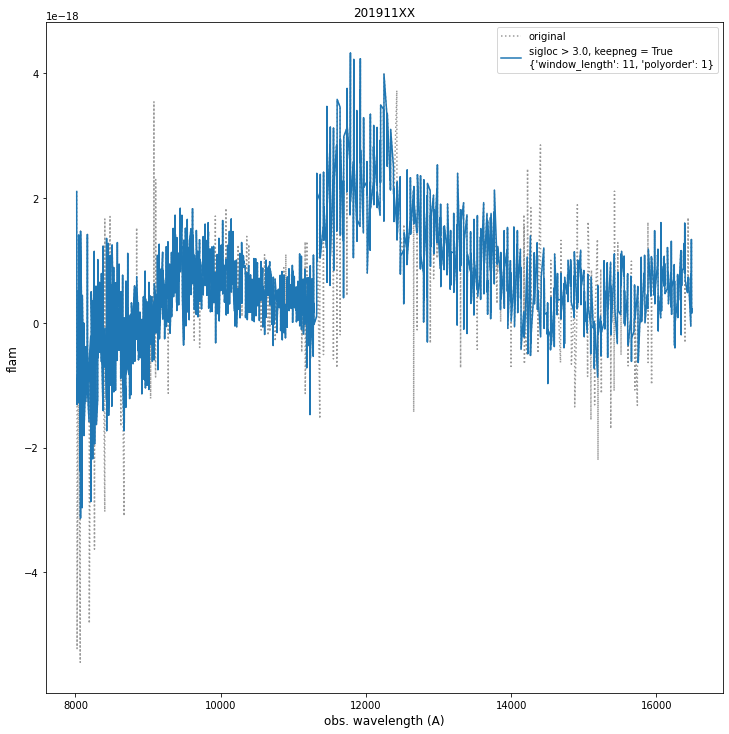

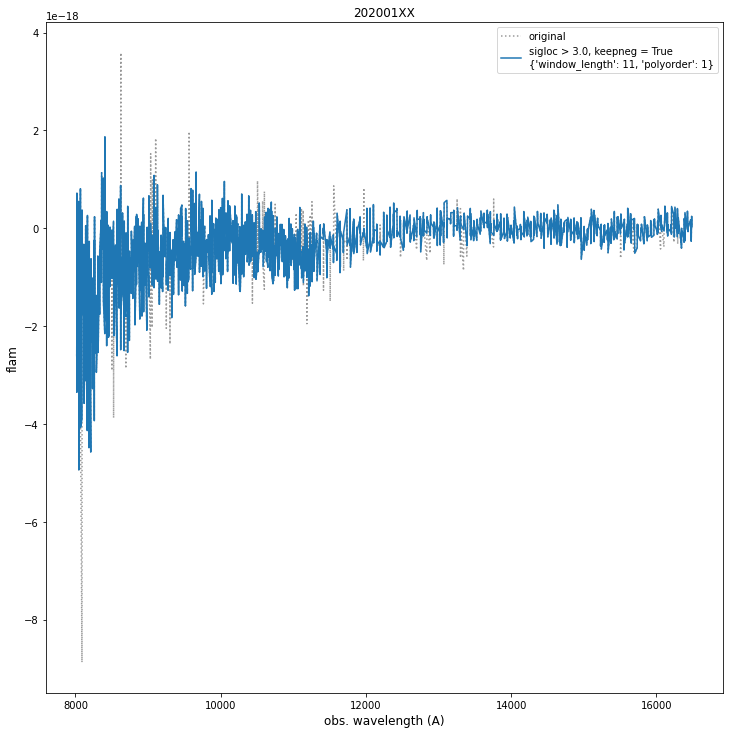

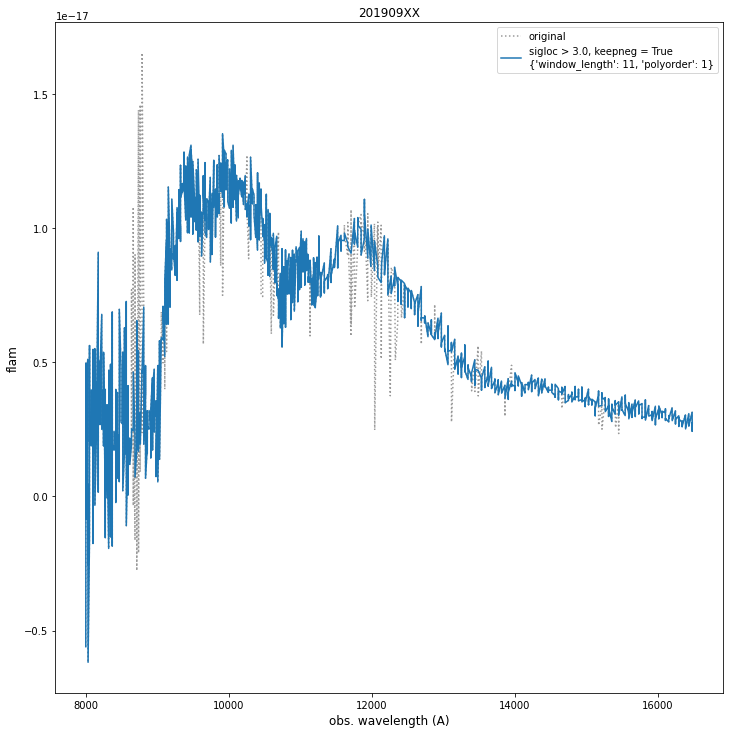

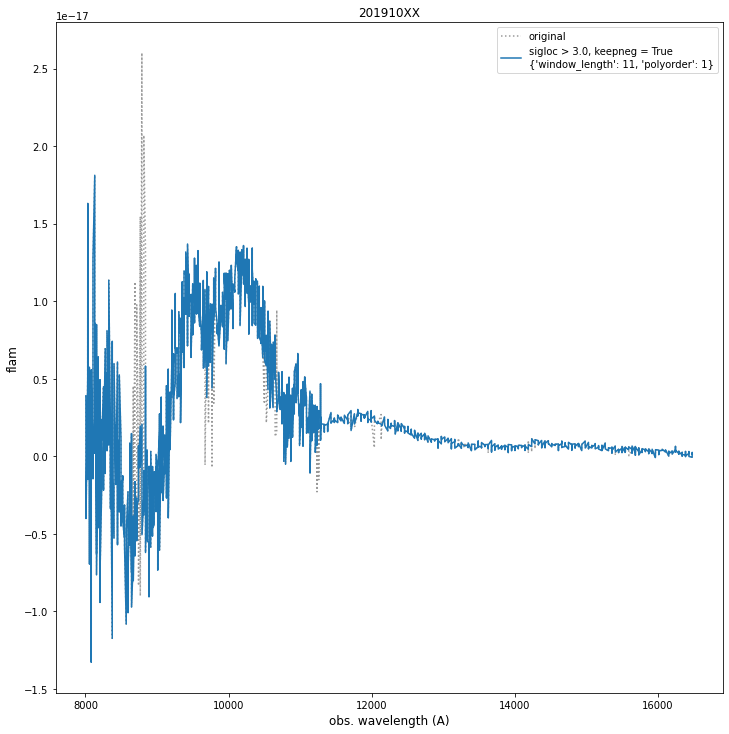

In [8]:
for i in flist:
    tmp = flist[i]['df']
    plt.figure(figsize=(10,10))
    tmpx,tmpy,m = tmp.LAMBDA.values,tmp.FLUX.values,tmp.MASKGOOD_SIGLOC.values
    plt.plot(tmpx,tmpy,'k:',alpha=0.4,label='original')
    tmpx,tmpy = tmpx[m],tmpy[m]
    string = 'sigloc > {0}, keepneg = {1}'.format(sigma,keepneg)
    string += '\n{0}'.format(dictionary)
    plt.plot(tmpx,tmpy,label=string)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.title(i,fontsize=12)
    plt.xlabel('obs. wavelength (A)',fontsize=12)
    plt.ylabel('flam',fontsize=12)
    string = '{0}_sigloc.pdf'.format(i)
    plt.savefig(string,format='pdf',bbox_inches='tight')
    

# Combine

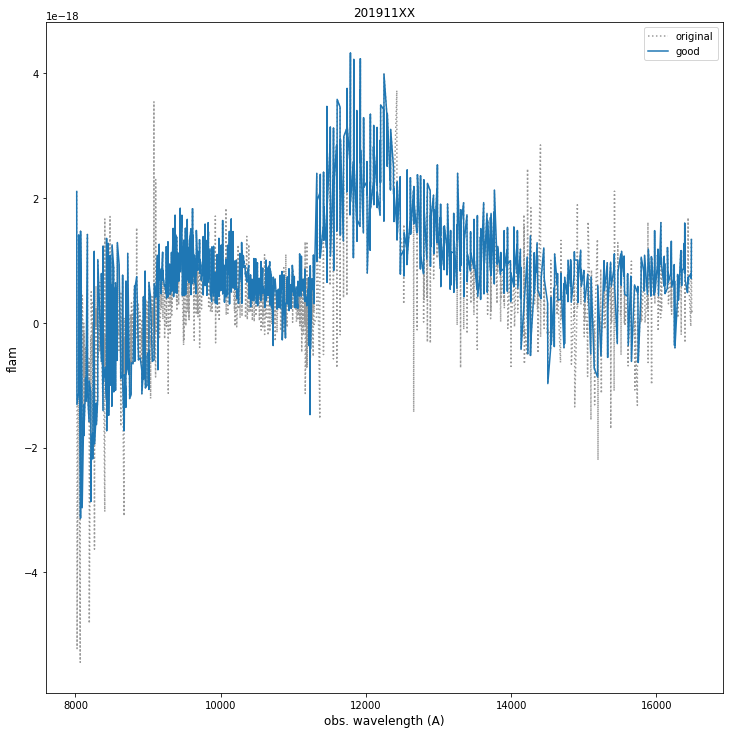

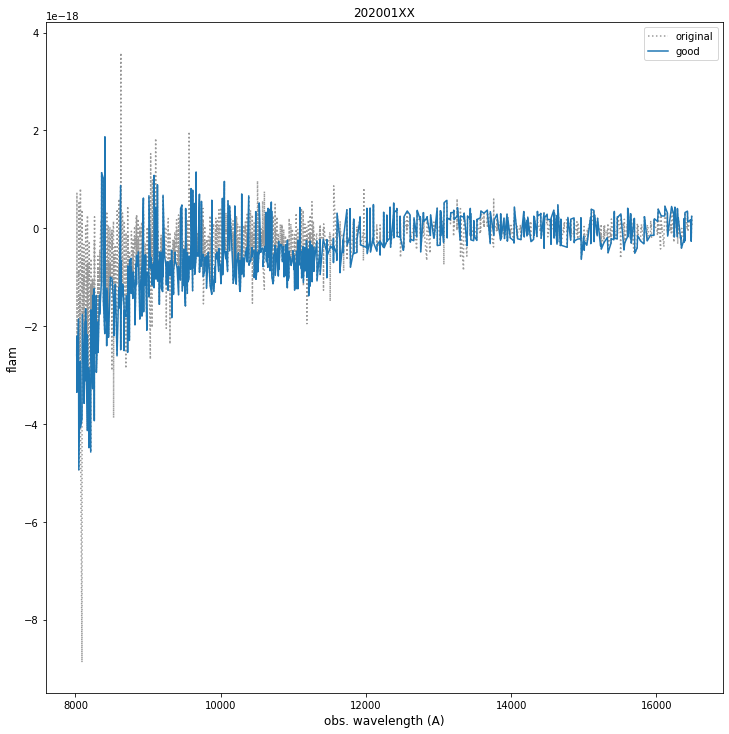

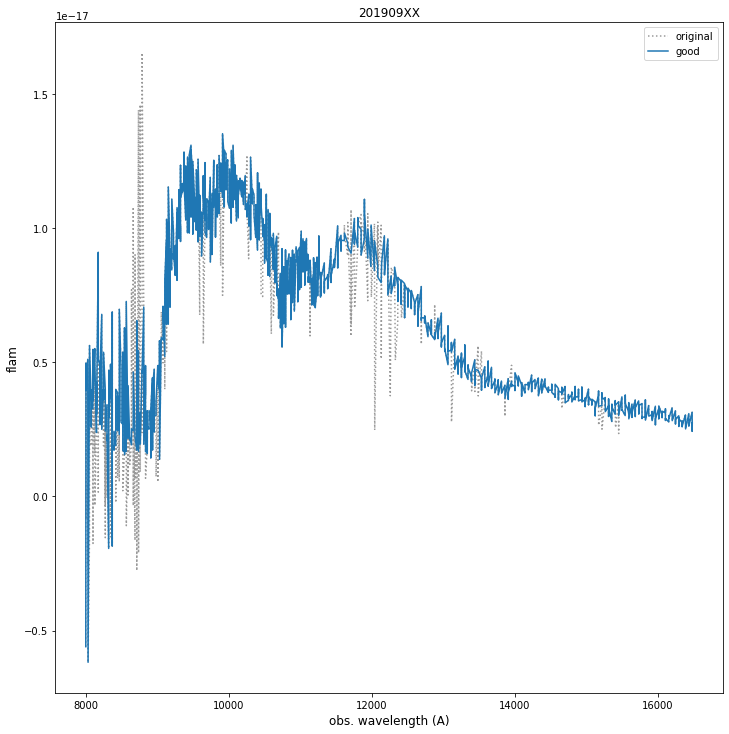

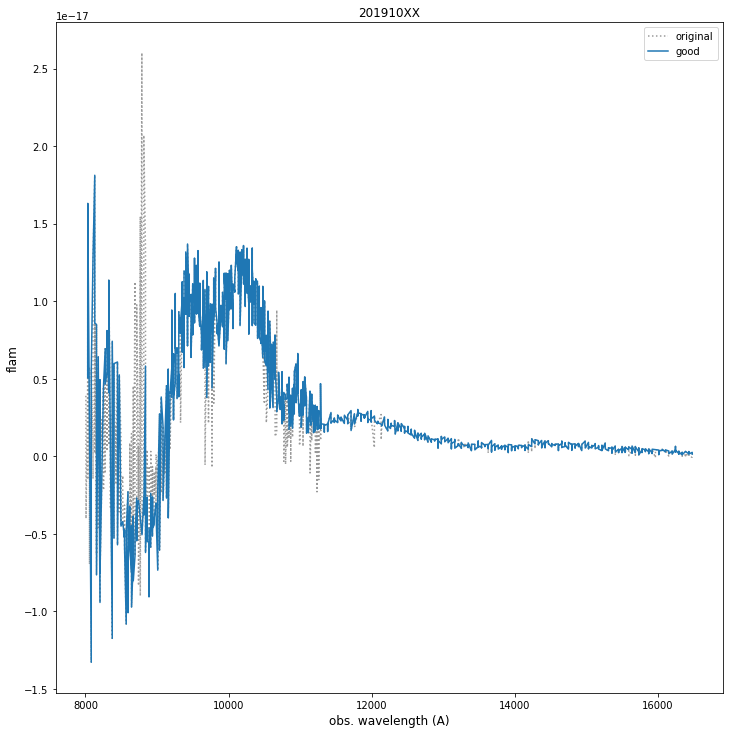

In [9]:
for i in flist:
    tmp = flist[i]['df']
    plt.figure(figsize=(10,10))
    tmpx,tmpy = tmp.LAMBDA.values,tmp.FLUX.values
    m = (tmp.MASKGOOD_SN.values & tmp.MASKGOOD_SIGLOC.values)
    plt.plot(tmpx,tmpy,'k:',alpha=0.4,label='original')
    tmpx,tmpy = tmpx[m],tmpy[m]
    string = 'good'
    plt.plot(tmpx,tmpy,label=string)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.title(i,fontsize=12)
    plt.xlabel('obs. wavelength (A)',fontsize=12)
    plt.ylabel('flam',fontsize=12)
    string = '{0}_good.pdf'.format(i)
    plt.savefig(string,format='pdf',bbox_inches='tight')
    

In [10]:
try:
    os.mkdir('EXTRA')
except:
    pass
for i in flist:
    tmp = flist[i]['df']
    tmpp = {}
    tmpp['LAMBDA'] = tmp.LAMBDA.values
    tmpp['FLUX'] = tmp.FLUX.values
    tmpp['FERROR'] = tmp.FERROR.values
    tmpp['MASKGOOD'] = (tmp.MASKGOOD_SN.values & tmp.MASKGOOD_SIGLOC.values)
    tmpp = pd.DataFrame(tmpp)
    string = './EXTRA/{0}_reject.csv'.format(i)
    tmpp.to_csv(string,index=False)
    